**Content** <a id="content"></a>

<br>[**Libraries importing**](#labs)
<br>[**Dataset download**](#Download)
<br>[**Descriptions of the Dataset**](#Description)
<br>[**Analysis:**](#Analysis)
 - [Adjustment of datatypes and looking for additional information included in data](#Start)
 - [Cargo weights distribution between years for General Dataset](#CargoWeights)
  -  [Cargo weights distribution between years for General Dataset](#CargoWeights)
  -  [Let's consider seasonality excistence and take for this the 2-years period: 2019 and 2020](#seasonality)
  -  [What about airlines qty - was there a negative impact on Qty of airlines](#AirlineQty)
 - [Cargo weights distribution between years for Freighter aircraft type slice](#Freightersweight)
 - [Cargo weights distribution between years for Passenger aircraft type slice](#Passengersboardw)
 - [Cargo transportation in regard to routes: Domestic vs International](#Routes)
  - [Cargo Weight as indicator](#WeihgtsInd)
  - [Flights Qty as indicator](#FlightsInd)
  - [Mean of Weight per flight as indicator](#MeanIndicator)
 - [Qty of operating airlines from year to year](#ALQty)
 - [How Cargo types ratio changed throught years](#cargotypes)
 - [Geo Regions and cargo weights](#GeoRegions)
 - [Import vs Export](#ImpExp)
 
<br>[**Summary**](#Sumup)


---

### **Libraries importing** <a id="labs"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import numpy as np
import re

### **Dataset download** <a id="Download"></a>

In [2]:
data = pd.read_csv('~/Air_Traffic_Cargo_Statistics.csv')

### **Description of the Dataset** <a id="Description"></a>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34037 entries, 0 to 34036
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   activity_period         34037 non-null  int64  
 1   operating_airline       34037 non-null  object 
 2   operating_airline_iata  33992 non-null  object 
 3   published_airline       34037 non-null  object 
 4   published_airline_iata  33992 non-null  object 
 5   geo_summary             34037 non-null  object 
 6   geo_region              34037 non-null  object 
 7   activity_type           34037 non-null  object 
 8   cargo_type              34037 non-null  object 
 9   cargo_aircraft_type     34037 non-null  object 
 10  cargo_weight_lbs        34037 non-null  int64  
 11  cargo_metric_tons       34037 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.1+ MB


In [5]:
data.describe()

,activity_period,cargo_weight_lbs,cargo_metric_tons
count,34037.000000,3.403700e+04,34037.000000
mean,201274.946529,4.773309e+05,216.517292
std,451.925014,9.484717e+05,430.226777
min,200507.000000,1.000000e+00,0.000454
25%,200903.000000,1.870200e+04,8.483227
50%,201302.000000,1.331840e+05,60.412262
75%,201703.000000,5.469500e+05,248.096520
max,202012.000000,2.381234e+07,10801.278330


In [6]:
data.head()

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,cargo_type,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Deplaned,Cargo,Freighter,45423,20.603873
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Enplaned,Cargo,Freighter,106869,48.475778
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,55427,25.141687
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,50278,22.806101
4,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,74183,33.649409


In [7]:
data.tail()

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,cargo_type,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons
34032,202012,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Express,Passenger,1916,0.869098
34033,202012,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Mail,Passenger,10271,4.658926
34034,202012,United Airlines,UA,United Airlines,UA,International,Middle East,Enplaned,Cargo,Passenger,183790,83.367144
34035,202012,United Airlines,UA,United Airlines,UA,International,Middle East,Enplaned,Express,Passenger,4400,1.995840
34036,202012,United Airlines,UA,United Airlines,UA,International,Middle East,Enplaned,Mail,Passenger,25029,11.353154


---

### The dataset contains data of airflights of Amreican airlines (internal and international routes) through San Francisco International Airport (SFO), California, USA. The data is presented in the following groups (columns): 

 <br>0   activity_period         - Dates of flights performing starting with July, 2005 up to December, 2020. Detailed up to months.
 <br>1   operating_airline       - Names of airlines
 <br>2   operating_airline_iata  - Ailine IATA code https://www.iata.org/en/about/ 
 <br>3   published_airline       - Names of airlines 
 <br>4   published_airline_iata  - Ailine IATA code https://www.iata.org/en/about/ 
 <br>5   geo_summary             - indicates International or Domestic routes
 <br>6   geo_region              - shows a region of destination or departure included in a route. Any place outside California involved in a route.
 <br>7   activity_type           - shows the kind of activity - whether cargo was departed from a geo_region or deliverd to a geo_region 
 <br>8   cargo_type              - indicates cargo type: Express, Cargo, Mail, etc. 
 <br>9   cargo_aircraft_type     - indicats the type of aircraft - a cargo or passenger flight
 <br>10  cargo_weight_lbs        - cargo weight in lbs (= pounds)
 <br>11  cargo_metric_tons       - cargo metric weight in tons. Weight ranges 0,0004 tons (supposedly a mail) to 10801 tons (heavy cargo delivery).
 
 
 <br> The dataset has 12 columns, 34037 entries

#### **The aim of the analysis is to research whether Covid-19 affected Airtransportation shpere. The Dataset  will be explored to detect any prominent changes occured in routes, or in extents of cargo deliveries.** 

### **Adjustment of datatypes and looking for additional information included in data** <a id="Start"></a>

##### [back to Content](#content)

In [8]:
dt_copy=data.copy()

In [9]:
dt_copy['date'] = pd.to_datetime(dt_copy['activity_period'], format='%Y%m')

In [10]:
dt_copy.head(2)

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,cargo_type,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons,date
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Deplaned,Cargo,Freighter,45423,20.603873,2005-07-01
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Enplaned,Cargo,Freighter,106869,48.475778,2005-07-01


In [11]:
dt_copy.dropna(subset=['operating_airline'], inplace=True)

___

<br> The numbers didn't change, thus the initial dataset doesn't contain inavailable data. 
<br> decided to not drop all NANs by default, chose dropping in case of NAN occurance in'operating_airline' column. 
<br> The reason - this way allows year-to-year comparison including airlines, whcih stopped operating in a particular period (if there are any).

In [12]:
dt_copy.describe()

,activity_period,cargo_weight_lbs,cargo_metric_tons
count,34037.000000,3.403700e+04,34037.000000
mean,201274.946529,4.773309e+05,216.517292
std,451.925014,9.484717e+05,430.226777
min,200507.000000,1.000000e+00,0.000454
25%,200903.000000,1.870200e+04,8.483227
50%,201302.000000,1.331840e+05,60.412262
75%,201703.000000,5.469500e+05,248.096520
max,202012.000000,2.381234e+07,10801.278330


>>> The below are Activity periods.

In [13]:
dt_copy.activity_period.value_counts()

201909    210
201908    210
201907    209
201910    208
201906    207
         ... 
201406    155
202007    152
202006    129
202004    118
202005    117
Name: activity_period, Length: 186, dtype: int64

In [14]:
print(len(dt_copy.activity_period.value_counts()),' Activity periods (which is months) in the Dataset.')

186  Activity periods (which is months) in the Dataset.


>>> The below lists airlines and the number of flights made by each airline

In [15]:
dt_copy.operating_airline.value_counts()

United Airlines                     3218
United Airlines - Pre 07/01/2013    2503
Korean Air Lines                    1457
Alaska Airlines                     1338
Asiana Airlines                     1239
                                    ... 
Qatar Airways                          4
Focus Air                              2
Air Canada Jazz                        2
E.A.G.L.E.                             1
Atlantic Southeast Airlines            1
Name: operating_airline, Length: 96, dtype: int64

In [16]:
dt_copy.operating_airline.unique()

array(['ABX Air', 'ATA Airlines', 'Air Canada', 'Air China', 'Air France',
       'Air New Zealand', 'Alaska Airlines', 'All Nippon Airways',
       'American Airlines', 'Ameriflight', 'Asiana Airlines',
       'Astar Air Cargo', 'Atlantic Southeast Airlines',
       'British Airways', 'Cargolux Airlines', 'Cathay Pacific',
       'China Airlines', 'China Cargo Airlines', 'Delta Air Lines',
       'EVA Airways', 'Evergreen International Airlines',
       'Federal Express', 'Frontier Airlines', 'Hawaiian Airlines',
       'Horizon Air', 'Icelandair (Inactive)', 'Japan Airlines',
       'KLM Royal Dutch Airlines', 'Kalitta Air', 'Kitty Hawk Air Cargo',
       'Korean Air Lines', 'Lufthansa German Airlines',
       'Midwest Airlines', 'Nippon Cargo Airlines',
       'Northwest Airlines (became Delta)', 'Philippine Airlines',
       'Singapore Airlines', 'SkyWest Airlines', 'Sun Country Airlines',
       'TACA International Airlines, S.A.', 'Tradewinds Airlines',
       'US Airways', 'Unit

In [17]:
print(len(dt_copy.operating_airline.value_counts()),' unique airlinaes in the Dataset.')

96  unique airlinaes in the Dataset.


>>> the below shows the amount of IATA codes being used, accounting 88 in total

In [18]:
dt_copy.groupby(['operating_airline_iata']).count()['operating_airline']

operating_airline_iata
2Q     140
5X       8
5Y     220
8C      20
9S     134
      ... 
WW      55
XJ       5
YV       5
YX     218
bxr     56
Name: operating_airline, Length: 88, dtype: int64

In [19]:
dt_copy.groupby(['operating_airline_iata'])['operating_airline'].unique()

operating_airline_iata
2Q                    [Air Cargo Carriers]
5X              [United Parcel Service CO]
5Y                        [Atlas Air, Inc]
8C     [Air Transport International, Inc.]
9S                          [Southern Air]
                      ...                 
WW                               [WOW Air]
XJ                       [Mesaba Airlines]
YV                         [Mesa Airlines]
YX                      [Midwest Airlines]
bxr             [Redding Aero Enterprises]
Name: operating_airline, Length: 88, dtype: object

In [20]:
print(len(dt_copy.groupby(['operating_airline_iata'])['operating_airline'].unique()),' quantity of unique iata codes in the Dataset.')

88  quantity of unique iata codes in the Dataset.


>>> as we got 88 IATA codes, which is less than airlines quantity, we may check for asterics (*) in iata codes or NAN in iata codes. Codes with asterics can be assigned by IATA to some controlled routes, thus the code itself can be duplicated but expanded with the asterics-symbol as an additional identificator. Also we should keep in mind,that iata code isn't mandatory to render air transportation services, so an airline has a right to not have it.

In [21]:
list_nNAN=dt_copy.operating_airline_iata.notnull()
list_nNAN

0        True
1        True
2        True
3        True
4        True
         ... 
34032    True
34033    True
34034    True
34035    True
34036    True
Name: operating_airline_iata, Length: 34037, dtype: bool

In [22]:
def starred_iata(string):
    """
    функция вытаскивает из строки категорию заказа а если категрия (С или А) не указана - проставляет N
    """
    if re.findall(r'\*', str(string)): #re.IGNORECASE полезен если мы хотим поймать "c" и "С"
        string = '*'
    elif re.findall(r'NAN', str(string), flags=re.IGNORECASE): #re.IGNORECASE полезен если мы хотим поймать "nan" и "NAN"
        string = 'NAN'    
    else:
        string = 'N'
    return string

In [23]:
dt_copy['starred_iata'] = [starred_iata(number) for number in dt_copy['operating_airline_iata']]

In [24]:
dt_copy.head(2)

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,cargo_type,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons,date,starred_iata
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Deplaned,Cargo,Freighter,45423,20.603873,2005-07-01,N
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Enplaned,Cargo,Freighter,106869,48.475778,2005-07-01,N


In [25]:
dt_copy.starred_iata.value_counts()

N      33992
NAN       45
Name: starred_iata, dtype: int64

>>> Thus the following airlines operate without iata

In [26]:
NAN_list=dt_copy.loc[dt_copy['starred_iata']=='NAN']
NAN_list.operating_airline.unique() #these ailines hanen't IATA codes

array(['Focus Air', 'E.A.G.L.E.', 'Swissport USA',
       'Air Transport International, LLC.', 'ASTAR USA, LLC',
       'Total Airport Services, Inc. (Inactive)'], dtype=object)

>>> thus we'll take data in the column 'opertaing_airline' as the primary key

In [29]:
import datetime as dt

In [30]:
dt_copy['year']=dt_copy['date'].dt.year.copy()

### **Cargo weights distribution between years for General Dataset** <a id="CargoWeights"></a>

##### [back to Content](#content)

In [31]:
dt_copy.groupby('year').sum()['cargo_metric_tons']

year
2005    295960.964446
2006    594856.637876
2007    562933.038731
2008    492150.195734
2009    408102.419947
2010    426724.360120
2011    382018.488512
2012    380790.013616
2013    363793.555843
2014    400614.544460
2015    459467.541894
2016    483230.679727
2017    561805.879926
2018    571355.322954
2019    546436.979329
2020    439358.440552
Name: cargo_metric_tons, dtype: float64

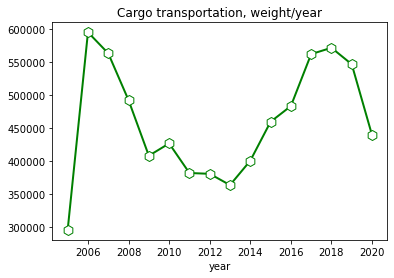

In [32]:
dt_copy.groupby('year').sum()['cargo_metric_tons'].plot.line(y='year', title='Cargo transportation, weight/year',color = 'g',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

>>> **The data shows that the peak of transported cargo weight was indicated in 2007. The year-to-year line isn't ascending or descending, the yearly cargo weight fluctates. So we can't make a conslusion that the drop in cargo weights in 2020 was caused solely by COVID-19. But the lowest points are indicated in 2013-2014 and 2020 - the years of world crisises beginning. So there is correlation between the figures reflecting the situation in cargo transportation and global situation in economics and goods supply.**

### **Let's consider seasonality excistence and take for this the 2-years period: 2019 and 2020**<a id="seasonality"></a>

##### [back to Content](#content)

In [33]:
dt_2019_2020=dt_copy.loc[(dt_copy['year']==2019)|(dt_copy['year']==2020)]
dt_2019_2020.head()

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,cargo_type,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons,date,starred_iata,year
29677,201901,Aer Lingus,EI,Aer Lingus,EI,International,Europe,Deplaned,Cargo,Passenger,148596,67.403146,2019-01-01,N,2019
29678,201901,Aer Lingus,EI,Aer Lingus,EI,International,Europe,Enplaned,Cargo,Passenger,87669,39.766658,2019-01-01,N,2019
29679,201901,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,61941,28.096438,2019-01-01,N,2019
29680,201901,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Express,Passenger,3342,1.515931,2019-01-01,N,2019
29681,201901,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Mail,Passenger,78048,35.402573,2019-01-01,N,2019


In [34]:
dt_copy_2019_2020 = pd.DataFrame(dt_2019_2020.groupby([dt_2019_2020.date, dt_2019_2020.geo_summary])['cargo_metric_tons'].sum())
dt_copy_2019_2020.index.set_names(['Year', 'GEO'], inplace = True)
dt_copy_2019_2020.head()

cargo_metric_tons
Year       GEO                             
2019-01-01 Domestic            17308.721910
           International       26211.399379
2019-02-01 Domestic            13827.525617
           International       25160.297954
2019-03-01 Domestic            16693.939686

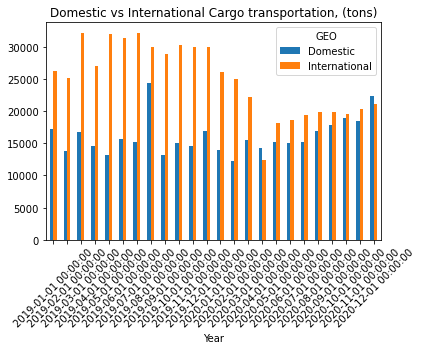

In [35]:
dt_copy_2019_2020.unstack().plot.bar(y='cargo_metric_tons', title='Domestic vs International Cargo transportation, (tons)', rot=45);

>>> there isn't such factor as seasonality

>>> in additional let's have a look at the 2-years dynamics 

In [36]:
dt_copy_2019_2020 = pd.DataFrame(dt_2019_2020.groupby([dt_2019_2020.year, dt_2019_2020.geo_summary])['cargo_metric_tons'].sum())
dt_copy_2019_2020.index.set_names(['Year', 'GEO'], inplace = True)
dt_copy_2019_2020.head()

cargo_metric_tons
Year GEO                             
2019 Domestic           190650.378849
     International      355786.600480
2020 Domestic           196277.971328
     International      243080.469224

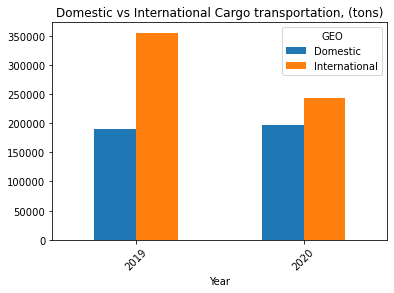

In [37]:
dt_copy_2019_2020.unstack().plot.bar(y='cargo_metric_tons', title='Domestic vs International Cargo transportation, (tons)', rot=45);

### **What about airlines qty** <a id="AirlineQty"></a>

##### [back to Content](#content)

In [38]:
dt_copy.groupby('year').count()['operating_airline']

year
2005    1158
2006    2270
2007    2290
2008    2289
2009    2254
2010    2262
2011    2133
2012    2077
2013    2016
2014    1981
2015    2141
2016    2196
2017    2289
2018    2321
2019    2430
2020    1930
Name: operating_airline, dtype: int64

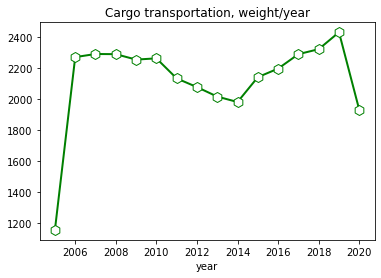

In [39]:
dt_copy.groupby('year').count()['operating_airline'].plot.line(y='year', title='Cargo transportation, weight/year',color = 'g',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

>>> analogous picture. But the lowest points are indicated in 2014 and 2020 - the both years are years of world crisises beginning. So there is correlation between the figures reflecting the situation in cargo transportation and global situation in economics and goods supply.  

#### **Cargo weights distribution between years for Freighter aircraft type slice**<a id="Freightersweight"></a>

##### [back to Content](#content)

In [40]:
dt_copy[dt_copy['cargo_aircraft_type']=='Freighter'].groupby('year').sum()['cargo_metric_tons']

year
2005    134701.112246
2006    266888.315682
2007    241792.363614
2008    196619.473611
2009    157114.064773
2010    158386.923071
2011    138748.178617
2012    127849.273322
2013    114300.496699
2014    123764.834390
2015    156474.933302
2016    149276.361174
2017    156704.271646
2018    146098.978452
2019    131388.932762
2020    172653.750308
Name: cargo_metric_tons, dtype: float64

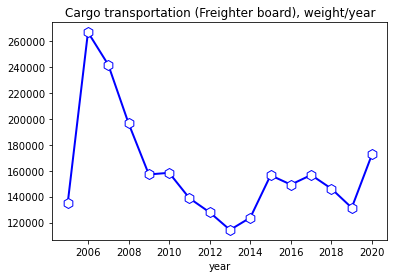

In [41]:
dt_copy[dt_copy['cargo_aircraft_type']=='Freighter'].groupby('year').sum()['cargo_metric_tons'].plot.line(y='year', title='Cargo transportation (Freighter board), weight/year',color = 'b',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

In [42]:
dt_copy[(dt_copy['cargo_aircraft_type']=='Freighter')&(dt_copy['geo_summary']=='International')].groupby('year').sum()['cargo_metric_tons']

year
2005     57349.782000
2006    114389.568771
2007    103735.511764
2008     87979.952540
2009     72076.456671
2010     92728.344391
2011     75080.284321
2012     58906.968573
2013     65214.885303
2014     61643.384057
2015     65784.571979
2016     57005.310449
2017     57608.008314
2018     51801.336367
2019     44802.931119
2020     53627.128531
Name: cargo_metric_tons, dtype: float64

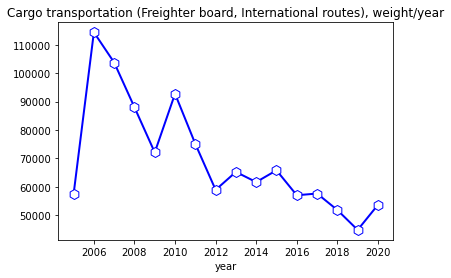

In [43]:
dt_copy[(dt_copy['cargo_aircraft_type']=='Freighter')&(dt_copy['geo_summary']=='International')].groupby('year').sum()['cargo_metric_tons'].plot.line(y='year', title='Cargo transportation (Freighter board, International routes), weight/year',color = 'b',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

#### **Cargo weights distribution between years for Passenger aircraft type slice**<a id="Passengersboardw"></a>
##### [back to Content](#content)

In [44]:
dt_copy[dt_copy['cargo_aircraft_type']=='Passenger'].groupby('year').sum()['cargo_metric_tons']

year
2005    149701.535880
2006    306052.752046
2007    299628.726868
2008    282222.101299
2009    240878.678948
2010    254925.623131
2011    232698.736418
2012    241369.492292
2013    244514.092435
2014    276845.480250
2015    302612.602471
2016    333954.318553
2017    405101.608279
2018    425256.344502
2019    415048.046567
2020    266704.690244
Name: cargo_metric_tons, dtype: float64

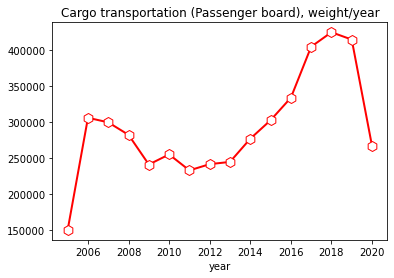

In [45]:
dt_copy[dt_copy['cargo_aircraft_type']=='Passenger'].groupby('year').sum()['cargo_metric_tons'].plot.line(y='year', title='Cargo transportation (Passenger board), weight/year',color = 'r',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

In [46]:
dt_copy[(dt_copy['cargo_aircraft_type']=='Passenger')&(dt_copy['geo_summary']=='International')].groupby('year').sum()['cargo_metric_tons']

year
2005     85728.546139
2006    182176.499434
2007    197019.586008
2008    185651.025993
2009    160061.638766
2010    171166.004453
2011    157410.312294
2012    156434.132435
2013    156837.945750
2014    187067.450506
2015    207913.366079
2016    234042.911528
2017    285968.136486
2018    312944.259196
2019    310983.669361
2020    189453.340694
Name: cargo_metric_tons, dtype: float64

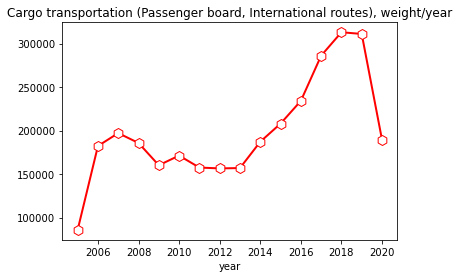

In [47]:
dt_copy[(dt_copy['cargo_aircraft_type']=='Passenger')&(dt_copy['geo_summary']=='International')].groupby('year').sum()['cargo_metric_tons'].plot.line(y='year', title='Cargo transportation (Passenger board, International routes), weight/year',color = 'r',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

### **Cargo transportation in regard to routes: Domestic vs International** <a id="Routes"></a>
##### [back to Content](#content)

---
> **Cargo Weight as indicator**<a id="WeihgtsInd"></a>

In [48]:
dt_copy.groupby([dt_copy.year, dt_copy.geo_summary]).sum()['cargo_metric_tons']

year  geo_summary  
2005  Domestic         141324.319988
      International    154636.644458
2006  Domestic         276374.999524
      International    318481.638352
2007  Domestic         240665.992711
      International    322267.046020
2008  Domestic         205210.596377
      International    286939.599358
2009  Domestic         165854.648283
      International    242247.771663
2010  Domestic         149418.197359
      International    277306.162761
2011  Domestic         138956.318421
      International    243062.170091
2012  Domestic         153877.664606
      International    226912.349010
2013  Domestic         136761.758081
      International    227031.797762
2014  Domestic         151899.480078
      International    248715.064382
2015  Domestic         185389.597714
      International    274077.944180
2016  Domestic         192182.457751
      International    291048.221976
2017  Domestic         218229.735125
      International    343576.144800
2018  Domestic    

In [49]:
dt_geo = pd.DataFrame(dt_copy.groupby([dt_copy.year, dt_copy.geo_summary])['cargo_metric_tons'].sum())
dt_geo.index.set_names(['Year', 'GEO'], inplace = True)
dt_geo.head()

cargo_metric_tons
Year GEO                             
2005 Domestic           141324.319988
     International      154636.644458
2006 Domestic           276374.999524
     International      318481.638352
2007 Domestic           240665.992711

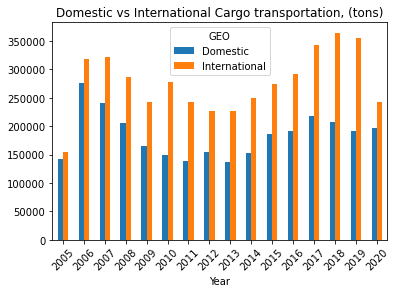

In [50]:
dt_geo.unstack().plot.bar(y='cargo_metric_tons', title='Domestic vs International Cargo transportation, (tons)', rot=45);

>>> The bar chart of ratio of Domsetic to International cargo weight (on yearly basis) shows drop of International cargo transporation in 2020. while the Domestic transportation almost remained the same. That could be the result of restrictions imposed due to COVID-19

---
> **Flights Qty as indicator**<a id="FlightsInd"></a>

In [51]:
dt_copy.groupby([dt_copy.year, dt_copy.geo_summary]).count()['cargo_metric_tons']

year  geo_summary  
2005  Domestic          432
      International     726
2006  Domestic          775
      International    1495
2007  Domestic          756
      International    1534
2008  Domestic          694
      International    1595
2009  Domestic          662
      International    1592
2010  Domestic          631
      International    1631
2011  Domestic          604
      International    1529
2012  Domestic          599
      International    1478
2013  Domestic          514
      International    1502
2014  Domestic          479
      International    1502
2015  Domestic          515
      International    1626
2016  Domestic          476
      International    1720
2017  Domestic          507
      International    1782
2018  Domestic          497
      International    1824
2019  Domestic          534
      International    1896
2020  Domestic          554
      International    1376
Name: cargo_metric_tons, dtype: int64

In [52]:
dt_geo_fl = pd.DataFrame(dt_copy.groupby([dt_copy.year, dt_copy.geo_summary])['cargo_metric_tons'].count())
dt_geo_fl.index.set_names(['Year', 'GEO'], inplace = True)
dt_geo_fl.head()

cargo_metric_tons
Year GEO                             
2005 Domestic                     432
     International                726
2006 Domestic                     775
     International               1495
2007 Domestic                     756

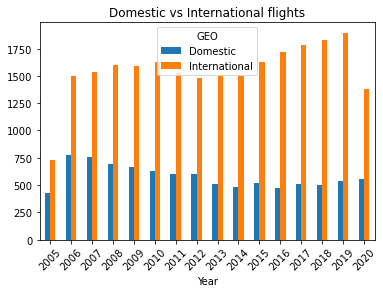

In [53]:
dt_geo_fl.unstack().plot.bar(y='cargo_metric_tons', title='Domestic vs International flights', rot=45);

>>> The bar chart of ratio of Domsetic to International flights (on yearly basis) shows drop of International cargo transporation in 2020. while the Domestic transportation almost remained the same. That could be the result of restrictions imposed due to COVID-19

---
> **Mean of Weight per flight as indicator**<a id="MeanIndicator"></a>

In [54]:
dt_copy.groupby([dt_copy.year, dt_copy.geo_summary]).mean()['cargo_metric_tons']

year  geo_summary  
2005  Domestic         327.139630
      International    212.998133
2006  Domestic         356.612903
      International    213.031196
2007  Domestic         318.341260
      International    210.082820
2008  Domestic         295.692502
      International    179.899435
2009  Domestic         250.535722
      International    152.165686
2010  Domestic         236.795875
      International    170.022172
2011  Domestic         230.060130
      International    158.968064
2012  Domestic         256.890926
      International    153.526623
2013  Domestic         266.073459
      International    151.152995
2014  Domestic         317.117912
      International    165.589257
2015  Domestic         359.979801
      International    168.559621
2016  Domestic         403.744659
      International    169.214083
2017  Domestic         430.433403
      International    192.803673
2018  Domestic         415.713737
      International    199.970173
2019  Domestic         357.0

In [55]:
dt_geo_mean = pd.DataFrame(dt_copy.groupby([dt_copy.year, dt_copy.geo_summary])['cargo_metric_tons'].mean())
dt_geo_mean.index.set_names(['Year', 'GEO'], inplace = True)
dt_geo_mean.head()

cargo_metric_tons
Year GEO                             
2005 Domestic              327.139630
     International         212.998133
2006 Domestic              356.612903
     International         213.031196
2007 Domestic              318.341260

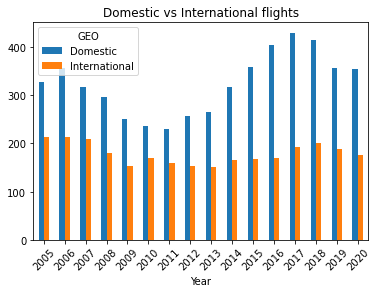

In [56]:
dt_geo_mean.unstack().plot.bar(y='cargo_metric_tons', title='Domestic vs International flights', rot=45);

>>> the average weights of cargo transported within the USA exceed the average weights of those transported in- or out-bound. That might be caused by high international transportation rates based on weight and dimensions of cargo. Supposedly, the major part of heavy cargo is delivered by other  transportation modes (sea, trucks, railway), not by air. The ratio of mean Domestic to mean International stays the same from 2012-2013. So, a strong influence of COVID-19 isn't seen in this chart.

### **Qty of operating airlines from year to year**<a id="ALQty"></a>
##### [back to Content](#content)

In [57]:
i=2005
my_list=[]
def airl_year2(data):
    for i in data['year'].unique():
        my_list.append(len(data[(data['year']==i)]['operating_airline'].unique())),
        i+=1
    print(my_list)
    return my_list  


In [58]:
i=2005
my_list_years=[]
def airl_year1(data):
    for i in data['year'].unique():
        my_list_years.append(i),
        i+=1
    print(my_list_years)
    return my_list_years   

In [59]:
s_y=pd.Series(airl_year1(dt_copy))

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [60]:
s_qty=pd.Series(airl_year2(dt_copy))

[46, 47, 48, 47, 45, 49, 47, 45, 46, 47, 46, 47, 51, 53, 55, 53]


In [61]:
data_Qty_airl = {'Year':s_y,
                      'Qty_of_unique_airlines':s_qty}
df_alltry = pd.DataFrame(data_Qty_airl)
df_alltry

,Year,Qty_of_unique_airlines
0,2005,46
1,2006,47
2,2007,48
3,2008,47
4,2009,45
5,2010,49
6,2011,47
7,2012,45
8,2013,46
9,2014,47


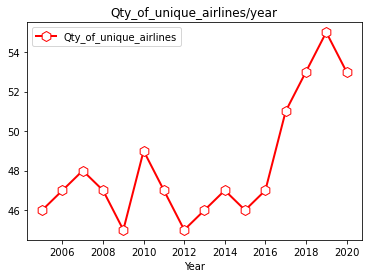

In [63]:
df_alltry.plot.line(y='Qty_of_unique_airlines', x='Year', title='Qty_of_unique_airlines/year',color = 'r',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

>>> There is no big difference in Qty of unique airlines operating in 2019 and 2020, so pandemic hadn't negative impact on this indicator of the sphere.

### **How Cargo types ratio changed throught years** <a id="cargotypes"></a>
##### [back to Content](#content)

---
>**Median weight per year**

In [64]:
Cargo_DomInt = pd.pivot_table(dt_copy, values='cargo_metric_tons', index=['year'], columns=['geo_summary','cargo_type'], aggfunc=np.median)
Cargo_DomInt.fillna(0)

geo_summary    Domestic                        International             \
cargo_type        Cargo    Express        Mail         Cargo    Express   
year                                                                      
2005          94.619599   5.144504   74.307845    255.825864  10.116187   
2006          89.704843   4.263840   44.145259    269.071438  10.255896   
2007          83.789899   2.879453   29.985455    241.476228  10.468861   
2008          77.718917   2.031901   23.370379    185.287208   6.519139   
2009          51.322118   1.816214   46.431403    153.147834   5.596517   
2010          57.669343   1.400263   72.248047    187.571765   4.945828   
2011          66.974947  14.783051   97.738099    165.863376   6.392812   
2012         102.085628  13.864964  105.623028    147.158953   5.891810   
2013         128.112516  16.828787  149.585940    147.240601   4.523526   
2014         144.460260  32.893031  102.321954    175.237474   2.021242   
2015         139.700635  35.457912   97.186295    161.300160   1.182989   
2016         142.955442  17.355870  112.584881    163.354061   2.067055   
2017         138.499502   2.298618   88.955723    204.630300   1.883801   
2018         156.420104   2.244866   99.321617    205.398698   1.690340   
2019         123.546125   1.664485   57.005273    165.196584   1.595311   
2020         110.929014   1.905800   69.284452    156.526247   1.616177   

geo_summary             
cargo_type        Mail  
year                    
2005         19.837289  
2006         19.554923  
2007         23.600808  
2008         18.893574  
2009         14.194051  
2010         11.817187  
2011         14.029394  
2012         12.842323  
2013         11.281032  
2014         12.659296  
2015         18.418655  
2016         21.527629  
2017         21.664390  
2018         22.957376  
2019         21.514248  
2020         18.592157

----
>**Cargo types in Domestic flights**

In [65]:
dt_Domestic=dt_copy.loc[dt_copy['geo_summary']=='Domestic']

In [66]:
dt_Domestic.head(2)

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,cargo_type,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons,date,starred_iata,year
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Deplaned,Cargo,Freighter,45423,20.603873,2005-07-01,N,2005
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Enplaned,Cargo,Freighter,106869,48.475778,2005-07-01,N,2005


In [67]:
dt_Dom_cargo = pd.DataFrame(dt_copy.groupby([dt_copy.year, dt_Domestic.geo_summary,dt_copy.cargo_type])['cargo_metric_tons'].count())
dt_Dom_cargo.index.set_names(['Year', 'GEO','Cargo_type'], inplace = True)
dt_Dom_cargo.head()

cargo_metric_tons
Year GEO      Cargo_type                   
2005 Domestic Cargo                     256
              Express                    60
              Mail                      116
2006 Domestic Cargo                     468
              Express                   110

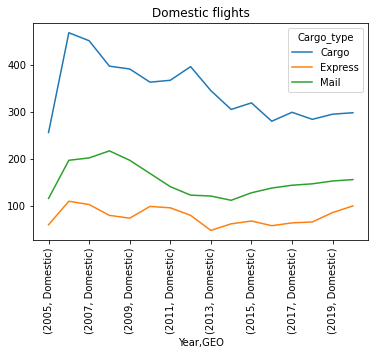

In [68]:
dt_Dom_cargo.unstack().plot.line(y='cargo_metric_tons', title='Domestic flights', rot=90);

----
>**Cargo types in International flights**

In [69]:
dt_Int=dt_copy.loc[dt_copy['geo_summary']=='International']

In [70]:
dt_Int.head(2)

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,cargo_type,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons,date,starred_iata,year
6,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,47025,21.330540,2005-07-01,N,2005
7,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Express,Passenger,7234,3.281342,2005-07-01,N,2005


In [73]:
dt_Int_cargo = pd.DataFrame(dt_copy.groupby([dt_copy.year, dt_Int.geo_summary,dt_copy.cargo_type])['cargo_metric_tons'].count())
dt_Int_cargo.index.set_names(['Year', 'GEO','Cargo_type'], inplace = True)
dt_Int_cargo.head()

cargo_metric_tons
Year GEO           Cargo_type                   
2005 International Cargo                     371
                   Express                    92
                   Mail                      263
2006 International Cargo                     746
                   Express                   183

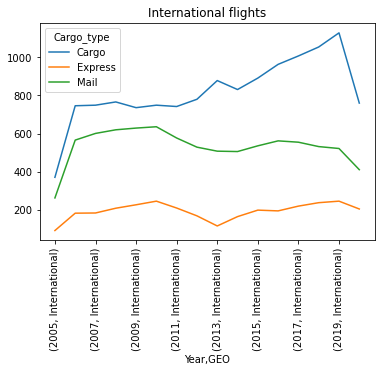

In [74]:
dt_Int_cargo.unstack().plot.line(y='cargo_metric_tons', title='International flights', rot=90);

### **Geo Regions and cargo weights** <a id="GeoRegions"></a>
##### [back to Content](#content)

In [75]:
dt_copy.geo_region.value_counts()

Asia                   12610
US                      9229
Europe                  5824
Australia / Oceania     2165
Canada                  1833
Mexico                  1110
Middle East              692
Central America          479
South America             95
Name: geo_region, dtype: int64

In [76]:
Cargo_GEO = pd.pivot_table(dt_copy, values='cargo_metric_tons', index=['year'], columns=['geo_region'], aggfunc=np.sum)
Cargo_GEO.fillna(0)

geo_region,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America,US
year,,,,,,,,,
2005,114917.766921,4163.886065,1214.254541,50.340074,33903.553622,386.843234,0.000000,0.000000,141324.319988
2006,236623.024615,11344.055638,2749.520441,47.058732,66926.153902,791.825026,0.000000,0.000000,276374.999524
2007,237699.467764,13475.874485,2527.047331,59.119502,67814.241919,691.295018,0.000000,0.000000,240665.992711
2008,211200.411593,13086.294682,1804.589086,42.577164,60132.272810,610.668526,62.785498,0.000000,205210.596377
2009,181012.477465,9857.927318,934.021822,14.486170,46049.279220,877.873399,3501.706270,0.000000,165854.648283
2010,206844.118386,11239.707226,1045.008670,16.968722,52706.970994,835.154712,2644.607750,1973.626301,149418.197359
2011,177470.716045,8425.966550,754.760462,21.895272,50421.032021,813.461292,1918.735711,3235.602737,138956.318421
2012,164676.208184,7505.633923,753.239088,63.318024,48496.528332,655.295054,1672.820554,3089.305850,153877.664606
2013,163921.376956,6763.360162,631.447488,87.020438,50583.536942,572.498086,1473.461539,2999.096150,136761.758081


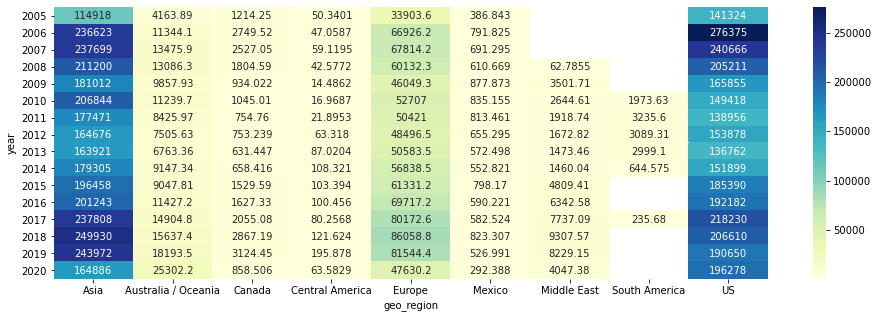

In [77]:
plt.figure(figsize=(16,5))
sns.heatmap(Cargo_GEO, annot=True, 
                fmt='g', cmap='YlGnBu') 
plt.show()

### **Import vs Export** <a id="ImpExp"></a>

##### [back to Content](#content)

In [78]:
dt_copy.groupby(['geo_region'])['activity_type'].unique()

geo_region
Asia                   [Deplaned, Enplaned]
Australia / Oceania    [Deplaned, Enplaned]
Canada                 [Deplaned, Enplaned]
Central America        [Deplaned, Enplaned]
Europe                 [Deplaned, Enplaned]
Mexico                 [Deplaned, Enplaned]
Middle East            [Deplaned, Enplaned]
South America          [Deplaned, Enplaned]
US                     [Deplaned, Enplaned]
Name: activity_type, dtype: object

>> **Deplaned can be considered Export from US, Enplaned - import (supposedly, need more detailed data to determine whether routes always looped in USA**

In [79]:
dt_copy.groupby(['geo_region'])['geo_summary'].unique()

geo_region
Asia                   [International]
Australia / Oceania    [International]
Canada                 [International]
Central America        [International]
Europe                 [International]
Mexico                 [International]
Middle East            [International]
South America          [International]
US                          [Domestic]
Name: geo_summary, dtype: object

>> **thus geo_summary can serve as the identificator for Import & Export shipments**

>**the Count of flights to each geo_region located beyond USA**

In [82]:
dt_copy[dt_copy['geo_summary']=='International'].groupby(['geo_region'])['cargo_metric_tons'].count()

geo_region
Asia                   12610
Australia / Oceania     2165
Canada                  1833
Central America          479
Europe                  5824
Mexico                  1110
Middle East              692
South America             95
Name: cargo_metric_tons, dtype: int64

>**the Sum of cargo weight transported to+out geo_region, located beyond USA**

In [83]:
dt_copy[dt_copy['geo_summary']=='International'].groupby(['geo_region'])['cargo_metric_tons'].sum()

geo_region
Asia                   3.167968e+06
Australia / Oceania    1.895229e+05
Canada                 2.513445e+04
Central America        1.176297e+03
Europe                 9.603265e+05
Mexico                 1.040134e+04
Middle East            5.320734e+04
South America          1.217789e+04
Name: cargo_metric_tons, dtype: float64

>**the Mean weight of cargo transported to+out geo_region, located beyond USA**

In [84]:
dt_copy[dt_copy['geo_summary']=='International'].groupby(['geo_region'])['cargo_metric_tons'].mean()

geo_region
Asia                   251.226684
Australia / Oceania     87.539449
Canada                  13.712192
Central America          2.455735
Europe                 164.891228
Mexico                   9.370575
Middle East             76.889227
South America          128.188272
Name: cargo_metric_tons, dtype: float64

In [85]:
ImpExp = pd.pivot_table(dt_copy[dt_copy['geo_summary']=='International'], values='cargo_metric_tons', index=['activity_type'], columns=['year'], aggfunc=np.sum)
ImpExp.fillna(0)

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
activity_type,,,,,,,,,,,,,,,,
Deplaned,92130.057786,181627.349050,183289.180234,156029.446391,127074.959978,144120.053650,120873.044124,117340.58060,119700.072625,133833.979188,152913.154968,166474.631032,201769.517377,219156.708911,213857.890243,138768.431862
Enplaned,62506.586672,136854.289303,138977.865786,130910.152967,115172.811686,133186.109111,122189.125967,109571.76841,107331.725136,114881.085194,121164.789212,124573.590944,141806.627423,145588.886652,141928.710237,104312.037362


In [86]:
dt_copy[dt_copy['geo_summary']=='International'].groupby(['activity_type'])['cargo_metric_tons'].sum()

activity_type
Deplaned    2.468959e+06
Enplaned    1.950956e+06
Name: cargo_metric_tons, dtype: float64

In [87]:
dt_copy[(dt_copy['geo_summary']=='International')&(dt_copy['year']==2019)].groupby(['activity_type'])['cargo_metric_tons'].sum()

activity_type
Deplaned    213857.890243
Enplaned    141928.710237
Name: cargo_metric_tons, dtype: float64

In [88]:
dt_copy[(dt_copy['geo_summary']=='International')&(dt_copy['year']==2020)].groupby(['activity_type'])['cargo_metric_tons'].sum()

activity_type
Deplaned    138768.431862
Enplaned    104312.037362
Name: cargo_metric_tons, dtype: float64

In [89]:
dt_Exp=dt_copy.loc[(dt_copy['activity_type']=='Deplaned')&(dt_copy['geo_summary']=='International')]

In [90]:
dt_Exp.head(2)

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,cargo_type,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons,date,starred_iata,year
6,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,47025,21.330540,2005-07-01,N,2005
7,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Express,Passenger,7234,3.281342,2005-07-01,N,2005


In [91]:
Exp = pd.pivot_table(dt_Exp, values='cargo_metric_tons', index=['year'], columns=['geo_region'], aggfunc=np.sum)
Exp.fillna(0)

geo_region,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America
year,,,,,,,,
2005,71851.613956,2821.955825,398.407313,43.295666,16765.385767,249.399259,0.000000,0.000000
2006,141104.557140,6963.503450,666.578354,36.403668,32351.972184,504.334253,0.000000,0.000000
2007,143511.640424,7429.894063,551.128536,33.760994,31252.201294,510.554923,0.000000,0.000000
2008,122931.846980,6928.757237,384.442330,10.741702,25301.568953,458.726134,13.363056,0.000000
2009,99349.805771,5533.320794,212.376427,3.921372,19959.725873,734.569366,1281.240374,0.000000
2010,112394.081671,6376.297838,270.546998,6.412543,22922.899171,683.870494,515.178922,950.766012
2011,92297.728757,4751.044049,117.895176,7.276651,21225.304800,489.270650,252.838001,1731.686040
2012,89270.003190,4135.834534,197.203961,42.746357,21398.513774,407.457540,294.103354,1594.717891
2013,89589.892341,3367.109088,177.775819,59.741842,24248.680344,439.049419,240.824405,1576.999368


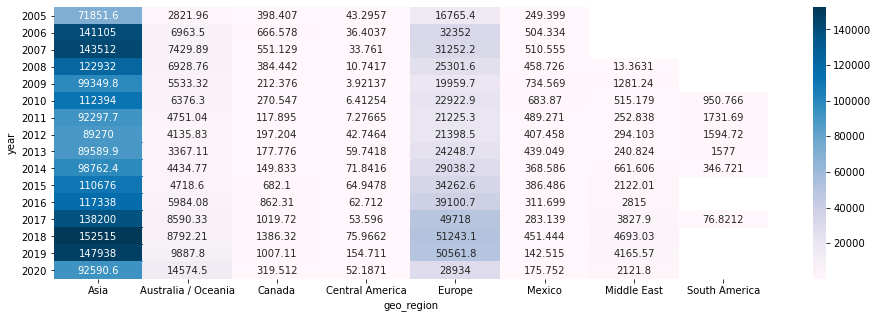

In [92]:
plt.figure(figsize=(16,5))
sns.heatmap(Exp, annot=True, 
                fmt='g', cmap='PuBu') 
plt.show()

In [93]:
dt_Imp=dt_copy.loc[(dt_copy['activity_type']=='Enplaned')&(dt_copy['geo_summary']=='International')]

In [94]:
Imp = pd.pivot_table(dt_Imp, values='cargo_metric_tons', index=['year'], columns=['geo_region'], aggfunc=np.sum)
Imp.fillna(0)

geo_region,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America
year,,,,,,,,
2005,43066.152965,1341.930240,815.847228,7.044408,17138.167855,137.443975,0.000000,0.000000
2006,95518.467475,4380.552187,2082.942086,10.655064,34574.181718,287.490773,0.000000,0.000000
2007,94187.827340,6045.980422,1975.918795,25.358508,36562.040626,180.740095,0.000000,0.000000
2008,88268.564613,6157.537445,1420.146756,31.835462,34830.703858,151.942392,49.422442,0.000000
2009,81662.671694,4324.606524,721.645394,10.564798,26089.553347,143.304034,2220.465895,0.000000
2010,94450.036715,4863.409387,774.461671,10.556179,29784.071823,151.284218,2129.428829,1022.860289
2011,85172.987288,3674.922502,636.865286,14.618621,29195.727221,324.190642,1665.897710,1503.916697
2012,75406.204995,3369.799390,556.035127,20.571667,27098.014558,247.837514,1378.717200,1494.587959
2013,74331.484616,3396.251074,453.671669,27.278597,26334.856598,133.448666,1232.637134,1422.096782


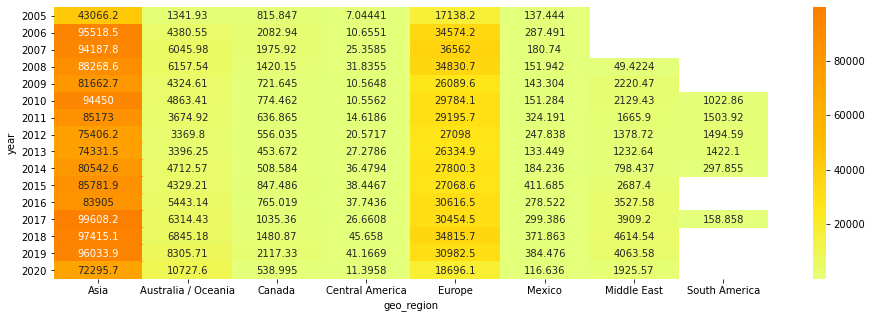

In [95]:
plt.figure(figsize=(16,5))
sns.heatmap(Imp, annot=True, 
                fmt='g', cmap='Wistia') 
plt.show()

### **Summary**<a id="Sumup"></a>
##### [back to Content](#content)

1) Seasonality isn't prominent or absents at all
<br>2) Decline in international cargo transportation can be caused by the consequences of the Covid pandemic. Similar tendencies can be seen in 2013-2014 - at the beginning of the previous world crises. Covid also negatively impacted the quantity of International flights.
<br>3) Cargo transportation (in metric tons)  increased for Cargo craft types and decreased for Freighters 
<br>4) Cargo air deliveries in the USA are mostly focused on inner territory according to mean cargo weights per flight. Probably due to international transportation rates. International transportation decreased while Domestic remained the same if to compare data of 2019 and 2020. The same situation with the flight quantity.
<br>5) Qty of airlines remained almost the same starting from 2017.
<br>6) Cargo types 2019 vs 2020 Domestic flights: Express deliveries increased in cargo weights, Mail remained the same level as it was in 2019, as well as Cargo (heavy cargo).
<br>7) Cargo types 2019 vs 2020 International flights: critical drop in cargo weights of all cargo types.
<br>8) Export & Import: Export from USA exceeds Import. Export/Import showed dramatical drop in 2020 compared to 2019. It should be noted that the amount of Exp&Imp during three previous to 2020 years (2017-2018-2019) remained on the same level (in regard to cargo weights). 
<br>9) The major amount of international cargo transportation (in metric tons) attributed to routes to/out Asia, Europe and South America; the major amount of international cargo transportation (in flights count) attributed to routes to/out Asia, Europe and Australia/Oceania.
